In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Reading data to DataFrame
df = pd.read_csv(r"C:\Users\rajen\Desktop\Shubhankar\data _to_pratice\Advertising.csv", index_col = 0)
df.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


# Data Analysis

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Checking Assumptions
- Linear Regression is A Parametric algorithm means before using Linear Regression we have to check few assumpttions if those assumtions are true then only we can use Linear Regression, other wise use other algorithm.

### Assumption 1: There should be no outliers

<Axes: >

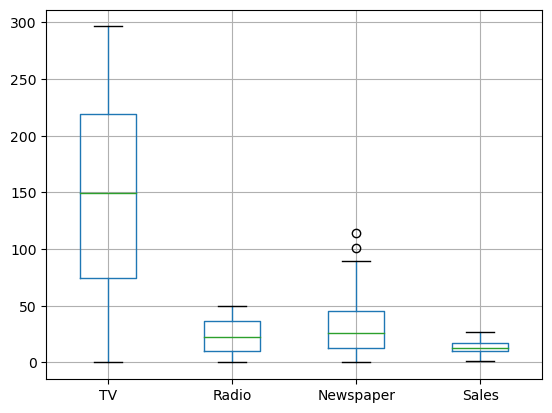

In [7]:
df.boxplot()

In data frame we have all the varaibles in continous numeric values, so we create box plot on all columns, by this plot we can say there is no outlier in tv and radio but newspaper contain two outliers 

<Axes: >

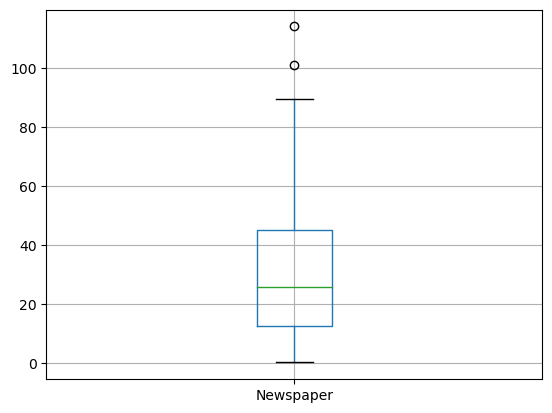

In [8]:
df.boxplot(['Newspaper'])

In [9]:
# Checking null values in for each column
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Check Missing Data

In [10]:
def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns
    
    data: input data frame 
    return: Missing value data frame 

    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [11]:
miss = check_missing_value(df)
miss

,Total,Percent
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


<Axes: >

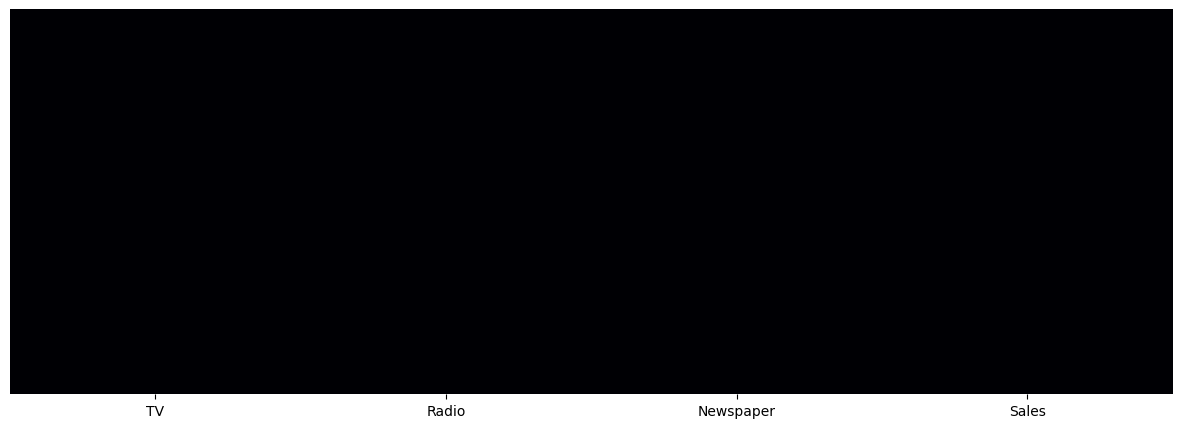

In [12]:
# if there were missing values white dashes would have apper on this black background
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels= False, cmap="magma")

### Assumption 2: Assumption of Lineartiy :
- Every Independet Variable should have a Linear Relationship` with the Dependent Variable.

In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

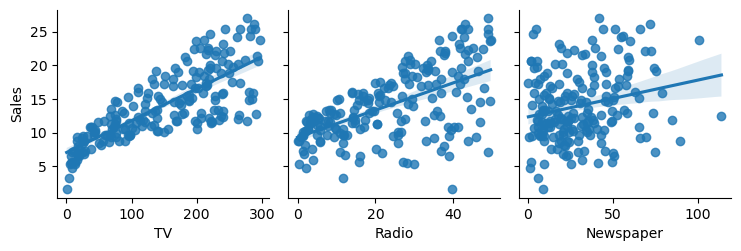

In [14]:
sns.pairplot(data = df,
            x_vars=['TV', 'Radio', 'Newspaper'],
            y_vars='Sales',
            kind="reg")
plt.show()

- Strong Positive Linear Relationship in Tv and sales
- Moderately Strong Positive Linear Relationship in Radio and sales
- NO Relation in Newspaper and Sales also the C.I ( Confidence Interval) is also high 

In [15]:
# creating x and y
feature_col = ['TV', 'Radio', 'Newspaper']
X = df[feature_col]
y = df.Sales

In [16]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [17]:
X.shape

(200, 3)

In [18]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

### Assumption 3: Assumption of Normality
- The dependet Variable should follow an approximate normal Distribution

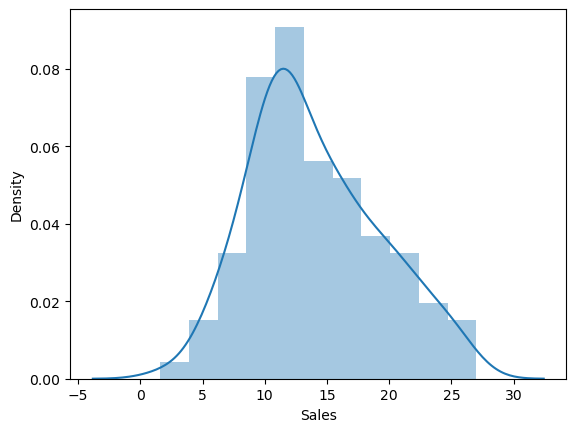

In [19]:
sns.distplot(y, hist=True)
plt.show()

SALE Variable is meeting the assumption and we can see the approximate normal Distribution

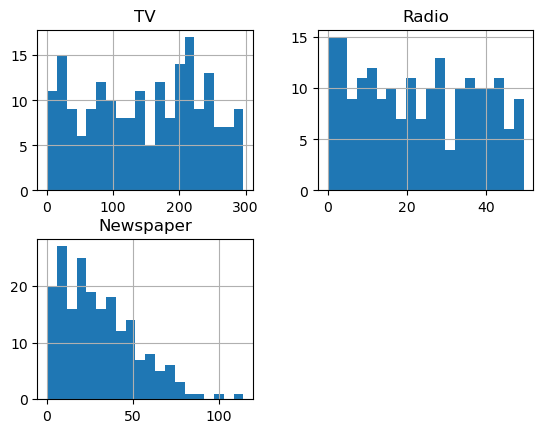

In [20]:
# check histogram for all variables
X.hist(bins=20)
plt.show()

In [21]:
data_skew = X.apply(lambda x: skew(x.dropna()))
data_skewed = data_skew[(data_skew > 0.75) | (data_skew < -0.75)]
print(data_skew)
print("-----"*25)
print(data_skewed)

TV          -0.069328
Radio        0.093467
Newspaper    0.887996
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Newspaper    0.887996
dtype: float64


If its not normal or if its skewed plot then we can transform the column in different transformation

1. Log Transform
    - Most of the time We Prefer log transform, because it will help you to smoothing of curve 
2. SQRT Transform
    - In sqrt transform we can see the peeks and sometime it will not help you to smoothing of curve

In [22]:
# applyig log +1 transformation for all numeric featreus with Skewness over 0.75
X[data_skewed.index] = np.log1p(X[data_skewed.index])

Range of skewness is -1 to +1 and `value close to 0 means normal distribution

If the variable consists of 0 value then log 0 will become -infinity which will give an error during building model, to avoid this we can use log +1 transformation.


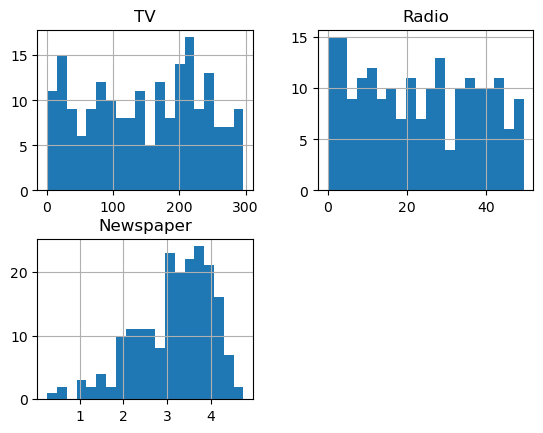

In [23]:
# checking hist for all variables after log transform of newspaper 
X.hist(bins=20)
plt.show()

### Assumption 4. There should be No multicolinearity in the Data
- To check the multicolinearity we can use the pearson correlation or VIF value

In [24]:
# Pearson Corrlelation
corr_df = X.corr(method="pearson")
print(corr_df)

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.030951
Radio      0.054809  1.000000   0.251909
Newspaper  0.030951  0.251909   1.000000


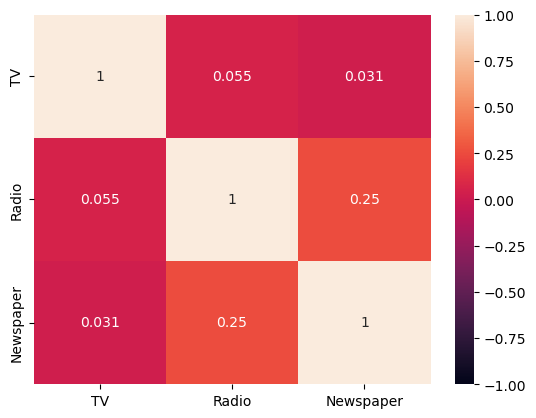

In [25]:
sns.heatmap(data = corr_df, vmax=1.0 , vmin=-1.0 ,annot=True)
plt.show()

We have values close to 0 means that is not correlated with each other.

In [26]:
# Checkinig VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns

vif_df["VIF factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF factor
0,TV,3.39
1,Radio,3.63
2,Newspaper,5.44


- Less than 5 value is good in VIF Which represent no multicolinearity.
- If VIF for column is high we can simply drop that column.
- VIF factor for Newspaper is slightly high than 5, but we will not drop it, as its important varaiable.

In [27]:
from sklearn.model_selection import train_test_split

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

In [28]:
df.shape

(200, 4)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Fitting the scaler on the training data and transform the training set
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

# Transforming the testing set using the same scaler
x_test_scale = scaler.transform(X_test)

The purpose of scaling is to ensure that all features contribute equally to the learning process, especially when features have different scales or units.

In [31]:
X_train

,TV,Radio,Newspaper
191,39.5,41.1,1.916923
8,120.2,19.6,2.533697
27,142.9,29.3,2.610070
139,43.0,25.9,3.068053
59,210.8,49.6,3.655840
...,...,...,...
114,209.6,20.6,2.459589
65,131.1,42.8,3.397858
16,195.4,47.7,3.987130
126,87.2,11.8,3.292126


In [32]:
print(X_train_scale)

[[0.12110845 0.82758621 0.36910949]
 [0.39719466 0.39148073 0.50670344]
 [0.4748546  0.58823529 0.52374121]
 [0.13308245 0.51926978 0.62591103]
 [0.70715019 1.         0.75703825]
 [0.07765994 0.663286   0.61309872]
 [0.62880602 0.34279919 0.5971572 ]
 [0.78002053 0.168357   0.44835052]
 [0.01094766 0.56389452 0.777408  ]
 [0.46219637 0.28397566 0.67339682]
 [0.1991105  0.2494929  0.60182933]
 [0.69380773 0.1643002  0.68000727]
 [1.         0.73022312 0.97301989]
 [0.54533014 0.74036511 0.41624968]
 [0.79815258 0.09736308 0.65505062]
 [0.16900445 0.03448276 0.63505936]
 [0.93328772 0.98580122 0.77950272]
 [0.66712282 0.61460446 0.76272954]
 [0.44543277 0.09330629 0.46173972]
 [0.21484776 0.23123732 0.75178892]
 [0.05234348 0.31845842 0.64384727]
 [0.75846733 0.16024341 0.84536828]
 [0.54464591 0.63488844 0.83094475]
 [0.69346562 0.09939148 0.61419497]
 [0.55661991 0.84584178 0.28191253]
 [0.79815258 0.55172414 0.49581902]
 [0.78823127 0.06288032 0.93465506]
 [0.25350667 0.94320487 0.73

In [33]:
from sklearn.linear_model import LinearRegression

# creating model object
lm = LinearRegression()

# training the model object
lm.fit(X_train_scale, y_train)


LinearRegression()

In [34]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.5777036762562524
[12.78593321  9.51672799 -0.21942783]


In [35]:
# pairing the feature names with the coefficients.
print(list(zip(feature_col,lm.coef_)))

[('TV', 12.785933211080348), ('Radio', 9.516727993391223), ('Newspaper', -0.2194278300878537)]


In [37]:
X_test

,TV,Radio,Newspaper
60,210.7,29.5,2.332144
6,8.7,48.9,4.330733
21,218.4,27.7,3.996364
199,283.6,42.0,4.207673
53,216.4,41.7,3.703768
20,147.3,23.9,3.000720
163,188.4,18.1,3.280911
56,198.9,49.4,4.110874
70,216.8,43.9,3.339322
3,17.2,45.9,4.252772


In [38]:
# preddiciting values using model
y_pred = lm.predict(x_test_scale)
y_pred

array([18.15026866, 12.96136899, 18.05815332, 23.66025079, 20.68751041,
       14.26325872, 14.92774472, 21.38847375, 21.14752911, 12.75788534,
       23.99735583,  7.20632737, 12.30777109, 19.22813333, 19.41581583,
       13.44985803, 19.62619644,  9.24667496, 21.1052867 , 20.87838433,
       15.52611251, 10.91695579, 22.82910679, 15.82915597, 17.40742204,
        8.17170435, 11.88738387, 12.69866637, 21.71275044,  7.94920205,
       12.49118989, 20.43292079,  4.71443086,  4.72126238, 16.7504848 ,
       15.74384945,  6.74775596, 17.73750244,  9.01170001, 13.60841593])

In [39]:
new_df = pd.DataFrame()
new_df = X_test
new_df["Actual Sales"] = y_test
new_df["Predicted Sales"] = y_pred
new_df = new_df.reset_index().drop("index", axis=1)
new_df.index = new_df.index + 1
new_df

,TV,Radio,Newspaper,Actual Sales,Predicted Sales
1,210.7,29.5,2.332144,18.4,18.150269
2,8.7,48.9,4.330733,7.2,12.961369
3,218.4,27.7,3.996364,18.0,18.058153
4,283.6,42.0,4.207673,25.5,23.660251
5,216.4,41.7,3.703768,22.6,20.687510
6,147.3,23.9,3.000720,14.6,14.263259
7,188.4,18.1,3.280911,14.9,14.927745
8,198.9,49.4,4.110874,23.7,21.388474
9,216.8,43.9,3.339322,22.3,21.147529
10,17.2,45.9,4.252772,9.3,12.757885


### Evaluation matrix

In [72]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
print("R_square: ",r2)

adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print("Adjusted R_Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)

R_square:  0.8236818234821521
Adjusted R_Square:  0.8089886421056648
RMSE:  2.6788202916614616


- $R^2$ value is close to 1 which means model is working good, where as $R^2$ value close to 0 means model is not working good.
- The $R^2$ value is 0.8237, indicating that the model explains approximately 82.37% of the variability in the target variable.
- Adjsuted R_Sqaure value is close to R_square, also RMSE is low, so overall model is good

In [73]:
# finding the range of the actual target variable y_test
print(min(y_test))
print(max(y_test))

1.6
25.5


In [74]:
new_df["Deviation"] = new_df["Actual Sales"] - new_df["Predicted Sales"]
new_df.to_csv("Advertising_Pred.csv", header=True, index=False)
new_df.head()

,TV,Radio,Newspaper,Actual Sales,Predicted Sales,Deviation
1,210.7,29.5,2.332144,18.4,18.150269,0.249731
2,8.7,48.9,4.330733,7.2,12.961369,-5.761369
3,218.4,27.7,3.996364,18.0,18.058153,-0.058153
4,283.6,42.0,4.207673,25.5,23.660251,1.839749
5,216.4,41.7,3.703768,22.6,20.687510,1.912490


# Tuning 

## Ridge 

In [75]:
from sklearn.model_selection import train_test_split

# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

In [76]:
from sklearn.linear_model import Ridge

# creating model object
rid = Ridge()

# training the model object
rid.fit(X_train_scale, y_train)


Ridge()

In [77]:
# print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

4.139703899924253
[11.86195582  8.88944348  0.03457977]


In [78]:
# pairing the feature names with the coefficients.
print(list(zip(feature_col, rid.coef_)))

[('TV', 11.86195582295514), ('Radio', 8.889443483025724), ('Newspaper', 0.03457976558441094)]


In [79]:
# preddiciting values using Ride model
y_pred = rid.predict(x_test_scale)
y_pred

array([17.80494395, 13.12098726, 17.80569546, 23.0317152 , 20.24666098,
       14.22748381, 14.85172571, 20.92803832, 20.65677128, 12.92438835,
       23.33140742,  7.67034509, 12.51746468, 18.88005226, 19.08808823,
       13.43947407, 19.14656879,  9.54577352, 20.60222096, 20.39186364,
       15.36114592, 11.10354178, 22.25152038, 15.76239281, 17.13327045,
        8.62332228, 12.00629476, 12.83893915, 21.15860495,  8.3591919 ,
       12.60710007, 19.99455383,  5.34543219,  5.37550453, 16.470879  ,
       15.58554602,  7.18974933, 17.38126681,  9.37025154, 13.5759934 ])

### Evaluation matrix

In [80]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
print("R square: ",r2)

adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print("Adjusted R_Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)

R square:  0.8236818234821521
Adjusted R_Square:  0.8089886421056648
RMSE:  2.6788202916614616


- $R^2$ value is close to 1 which means model is working good, where as $R^2$ value close to 0 means model is not working good.
- The $R^2$ value is 0.8237, indicating that the model explains approximately 82.37% of the variability in the target variable.
- Adjsuted R_Sqaure value is close to R_square, also RMSE is low, so overall model is good

## Lasso

In [81]:
from sklearn.model_selection import train_test_split

# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

In [82]:
from sklearn.linear_model import Lasso

# creating model object
las = Lasso()

# training the model object
las.fit(X_train_scale, y_train)


Lasso()

In [83]:
# print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

4.139703899924253
[11.86195582  8.88944348  0.03457977]


In [84]:
# pairing the feature names with the coefficients.
print(list(zip(feature_col, rid.coef_)))

[('TV', 11.86195582295514), ('Radio', 8.889443483025724), ('Newspaper', 0.03457976558441094)]


In [85]:
# preddiciting values using Lasso model
y_pred = las.predict(x_test_scale)
y_pred

array([13.9472068 , 13.58999835, 13.96082316, 14.07612015, 13.95728645,
       13.83509286, 13.90777241, 13.92634017, 13.95799379, 13.6050294 ,
       14.08690714, 13.69150214, 13.6044989 , 13.96453672, 13.98045195,
       13.75622407, 14.02625244, 13.58416277, 14.00202592, 13.93712716,
       13.90671139, 13.57585149, 14.03668575, 13.77037094, 14.07010773,
       13.60785878, 13.61988362, 13.65330559, 13.99884288, 13.60927346,
       13.80750647, 13.97779941, 13.6232435 , 13.62518869, 14.0886755 ,
       14.06391847, 13.716436  , 14.077358  , 13.73323541, 13.9678966 ])

### Evaluation matrix

In [86]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
print("R square: ",r2)

adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print("Adjusted R_Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)

R square:  0.022716175540530847
Adjusted R_Square:  -0.05872414316442498
RMSE:  6.306746755177879


- $R^2$ value is close to 0 which means model is not working good.
- The $R^2$ value is 0.023, indicating that the model explains approximately 2.27% of the variability in the target variable.
- RMSE value is low, but negative adjusted $R^2$ indicates that the model is not providing meaningful insights or may be overfitting.

## Elastic Net

In [87]:
from sklearn.linear_model import ElasticNet

# create a model object
en = ElasticNet()

# train the model object
en.fit(X_train_scale, y_train)           
     

ElasticNet()

In [88]:
# print intercept and coefficients
print(en.intercept_)                     
print(en.coef_) 

13.098590012070847
[0.92937568 0.64031436 0.        ]


In [89]:
# pairing the feature names with the coefficients.
print(list(zip(feature_col, rid.coef_)))

[('TV', 11.86195582295514), ('Radio', 8.889443483025724), ('Newspaper', 0.03457976558441094)]


In [90]:
# preddiciting values using Lasso model
y_pred = en.predict(x_test_scale)
y_pred

array([14.13473338, 13.74443851, 14.13583712, 14.52887239, 14.31131175,
       13.8604179 , 13.91576535, 14.35567857, 14.34115743, 13.73250012,
       14.55216394, 13.36715534, 13.7029724 , 14.21394879, 14.23087522,
       13.79264329, 14.24308911, 13.48717177, 14.34369773, 14.31922476,
       13.952822  , 13.59821277, 14.46706063, 13.96094884, 14.10374094,
       13.42327484, 13.66959011, 13.73357961, 14.38343301, 13.40503747,
       13.73938262, 14.29624178, 13.1898755 , 13.19207416, 14.05919725,
       13.99130526, 13.33665557, 14.12327107, 13.49544347, 13.83294389])

### Evaluation matrix

In [91]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
print("R square: ",r2)

adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print("Adjusted R_Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)

R square:  0.08806024528843148
Adjusted R_Square:  0.012065265729134023
RMSE:  6.09225553807746


- $R^2$ value is close to 1 which means model is working good, where as $R^2$ value close to 0 means model is not working good.
- The $R^2$ value is 0.0881, indicating that the model explains approximately 8.81%  of the variability in the target variable.
- RMSE value is low but not less than Linear and Ridge Regression model, also the adjusted $R^2$ is much lower than $R^2$, suggesting that the model might be overfitting or including variables that do not contribute meaningfully.

### Conclusion

Both Linear Regression and Ridge Regression fits equally well for the given dataset.
- Our model explains 83.5% of sales variability i.e high $R^2$ value.
- Adjusted $R^2$ validates model effectiveness.
- Predictions are accurate with RMSE of 2.6 units.

We can also say that Newspaper advertisement does not contribute much to the Sales. 